In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime as dt

## Data Import

In [2]:
#Reading the data into a dataframe
df_loan = pd.read_csv(r'\UpGrad\loan.csv', delimiter=',',encoding = "palmos")
# Setting up float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Looking at the shape of the data
print ("Shape of the dataframe: ", df_loan.shape)

Shape of the dataframe:  (39717, 111)


## Data Cleaning

The shape of the datframe shows us that there are 111 attributes in the dataframe. <br/>
Out of these 111 attributes, we can the following types of attributes: <br/>
1) Attributes with only NULL values <br/>
2) Attributes with a single constant value <br/>
3) Attributes with high granularity <br/>

### Dropping attributes with only NULL values

Columns/Attributes which have only NULLs should be dropped since they do not encompass any value to our analysis and objective

In [3]:
# Finding percentage of NULLs in each column of the dataframe
df_loan.isnull().sum()*100/df_loan.shape[0]

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [4]:
# Dropping fields with only NaN values
df_loan = df_loan.dropna(axis=1, how = 'all')

### Removing columns with one or two constant values 

Columns with one or two constant values are not significant enough for the EDA. Although, there might be some columns with two constant values which might pose as an important factor for analysis. 
Here, we drop the columns which have one/two constant values and also are not significant for the business objective.

In [5]:
# Removing non-relevant columns with constant values
non_relevant_cols = ['pymnt_plan','initial_list_status', 'next_pymnt_d', 'tax_liens', 'acc_now_delinq', 'policy_code','collections_12_mths_ex_med', 'application_type', 'pub_rec_bankruptcies', 'tax_liens','chargeoff_within_12_mths','delinq_amnt']
df_loan = df_loan.drop(non_relevant_cols,axis=1)

### Removing Attributes with high granularity

Atrributes with high granularity complicate the data analysis by adding too many features into one plate.
We think its better to remove these complex attributes from the data

In [6]:
# Removing non-relevant columns with large granularity of data for analysis
non_relevant_cols = ['id', 'member_id', 'sub_grade','url', 'desc', 'title', 'zip_code', 'emp_title']
df_loan = df_loan.drop(non_relevant_cols,axis=1)

print ("Dataframe Shape: ", df_loan.shape)
df_loan.describe()    # Descriptive Statistics

Dataframe Shape:  (39717, 38)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,...,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,...,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83
std,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,...,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14
min,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,...,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68
50%,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,...,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14
75%,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,52.00,104.00,...,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16
max,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,120.00,129.00,...,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20


## Observing the Data

After performing a basic data cleansing process, we have a total of 39 Attributes to further analyse.<br/>
We now plan to observe the data and further cleanse our data based on the following parameters:<br/>
1) Percentage of Missing Values in the Columns <br/>
2) Splitting the attributes of the dataframe to categorical and continuous data <br/>
3) Do the columns present contribute to the business objective? <br/>

### Percentage of missing values in the Attributes

In [7]:
# Finding percentage of NULLs in each column of the dataframe
df_loan.isnull().sum()*100/df_loan.shape[0]

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_re

The following attributes have a high percent of missing values:<br/>
1) mths_since_last_delinq <br/>
2) mths_since_last_record <br/>
Although, these attributes are significant in measuring whether an entity would default, the missing values in these columns signify that these attributes must be dropped from the dataframe <br/>

Also, other attributes of the dataframe have a missing value percentage of less than 5%. <br/>
Thus, these rows in the dataframe can be dropped straight away. <br/>

In [8]:
# Dropping 'mths_since_last_delinq' and 'mths_since_last_record' from the dataframe
high_missing_val_cols = ['mths_since_last_delinq', 'mths_since_last_record']
df_loan = df_loan.drop(high_missing_val_cols,axis=1)

# Dropping missing values from the dataframe
df_loan = df_loan.dropna()

### Categorising the varibles to Categorical and Continuous

In [9]:
# Checking the data types of variables
df_loan.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

In [10]:
#Converting numeric fields with datatype objects to float
df_loan = df_loan.convert_objects(convert_numeric=True)
df_loan.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

### Finding Correlation between the attributes

Finding correation between variables is a good start for analysis. Pearson correlation works on continuous variables. It will help us to find the correlation between variables in the data and reducing/merging/transforming highly correlated variables so that our focus is just on the few highly relevant variables.

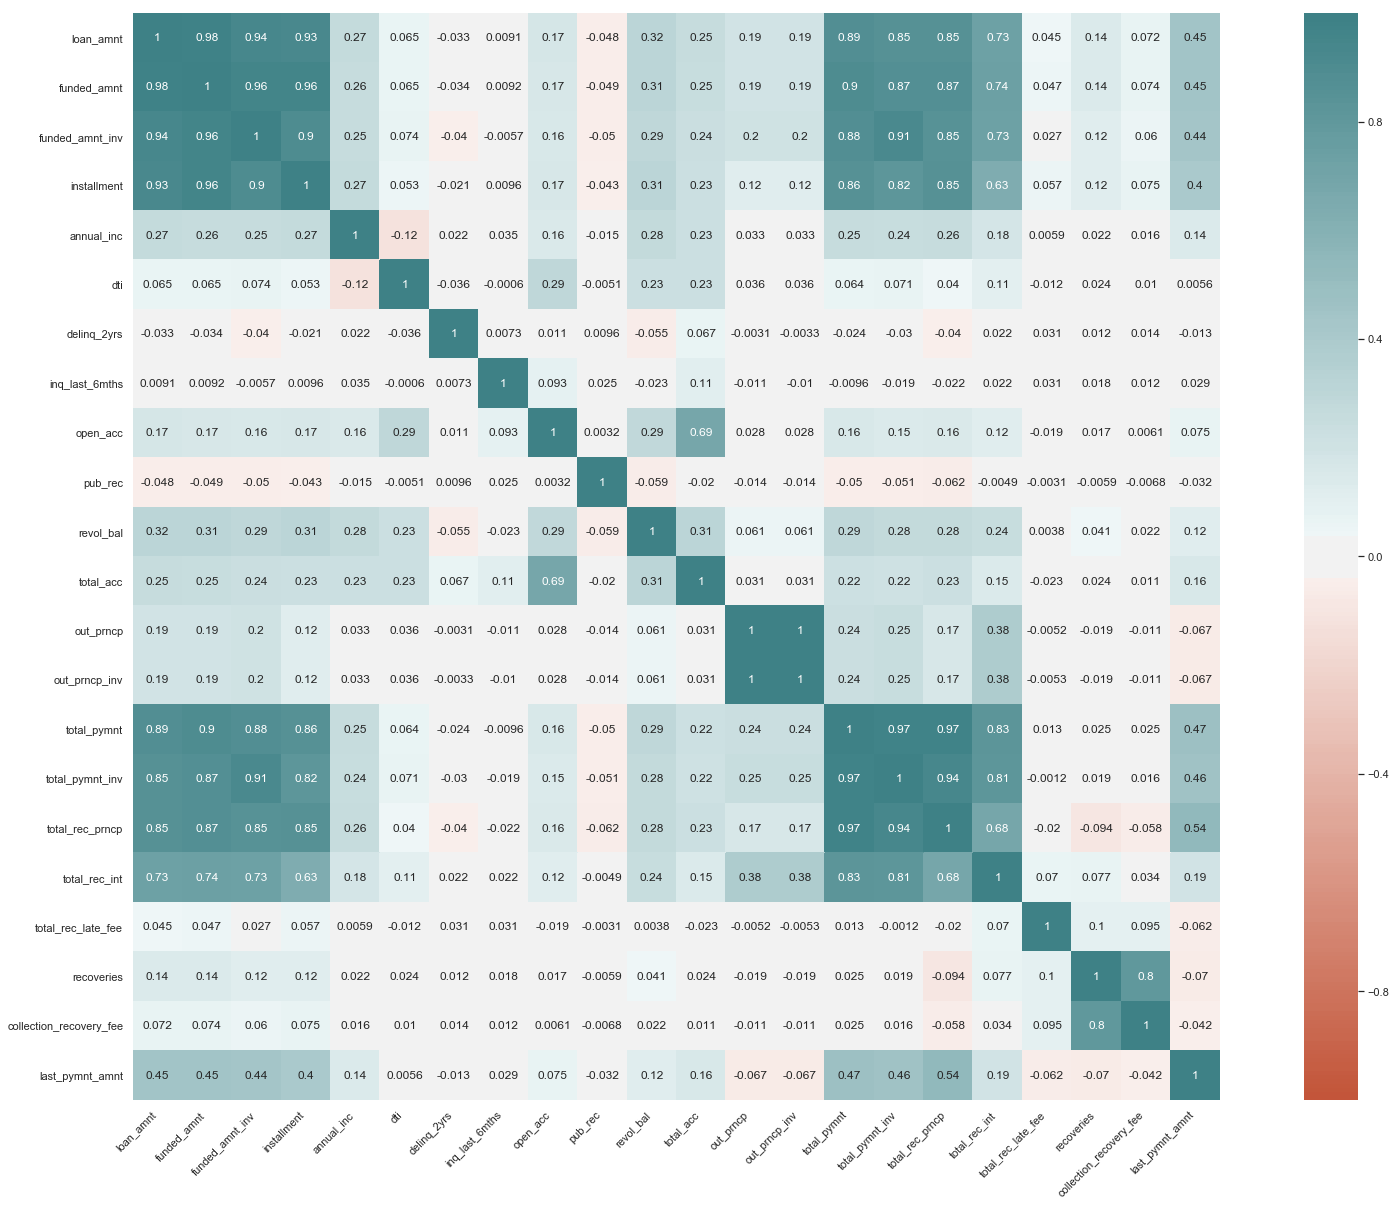

In [11]:
# Using corr() to find the pearson correlation for the numeric data
sns.set(style='whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.figure(figsize=(30,20))
corr = df_loan.corr()
# Plotting the correlation heatmap
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 200, n=220), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

The above correlation heatmap show some significant correlations between variables: <br/>
Positive Correlations : <br/>
1) loan_amnt, funded_amnt, funded_amnt_inv, installment, total_pymnt, total_pymnt_inv, total_rec_prncp and total_rec_int <br/>
2) out_prncp and out_prncp_inv <br/>
3) total_acc and open_acc <br/>
4) recoveries and collection_recovery_fee <br/>

### Selecting the variables based on domain understanding and business objective

We are selecting the following significant attributes for analysis: <br/>
1) loan_amnt <br/>
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. <br/>

2) funded_amnt <br/>
The total amount committed to that loan at that point in time. We are removing funded_amnt_inv as funded_amnt and funded_amnt_inv are highly correlated. They have the following relation<br/>
funded_amnt = funded_amnt_inv + funded_amnt_by_our_company <br/>
As, these two are highly correlated, we just consider funded_amnt. We also ignore other higly correlated variables like installment, total_pymnt, total_pymnt_inv, total_rec_prncp and total_rec_int <br/>

3) term <br/>
The number of payments on the loan. Values are in months and can be either 36 or 60. <br/>

4) issue_d <br/>
The month which the loan was funded <br/>

5) int_rate <br/>
Interest Rate on the loan <br/>

6) grade <br/>
LC assigned loan grade <br/>

7) emp_length <br/>
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  <br/>

8) home_ownership <br/>
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. <br/>

9) annual_inc <br/>
The self-reported annual income provided by the borrower during registration. <br/>

10) verification_status <br/>
Indicates if income was verified by LC, not verified, or if the income source was verified <br/>

11) loan_status <br/>
Current status of the loan <br/>

12) purpose	<br/>
A category provided by the borrower for the loan request. <br/>

13) addr_state <br/>
The state provided by the borrower in the loan application <br/>

14) dti	<br/>
Debt to Income Ratio = Monthly Debt Payments / Monthly Gross Income (Income excluding tax). As a general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified for a mortgage. Ideally, lenders prefer a debt-to-income ratio lower than 36%, with no more than 28% of that debt going towards servicing a mortgage or rent payment. <br/>

15) delinq_2yrs <br/>
A credit card holder becomes delinquent when he or she falls behind on credit card payments. When using a credit card, you must pay a certain fraction of your balance each month in order to stay current on your account. By giving you a line of credit, an issuer is basically providing you with a loan that you must pay down little-by-little each month. Not making the required monthly minimum payments are essentially breaking the terms of your agreement with the lender. Unfortunately, this results in escalating repercussions for the cardholder. <br/>
Delinquency is divided into levels which are indicative of how many payments the cardholder has missed. These levels are often referred to in terms of days. For example, the day after you miss your first payment, you are one day delinquent. After you miss your second payment, you are 30 days delinquent and so on. <br/>

16) open_acc <br/>
The number of open credit lines in the borrower's credit file. <br/>
As open_acc is directly related to total_acc, we consider analysing open credit lines rather than total credit lines for a brrower <br/>

17) pub_rec <br/>
Number of derogatory public records <br/>

18) out_prncp <br/>
Remaining outstanding principal for total amount funded <br/>.
Here, as out_prncp and out_prncp_inv are directly related, we ignore out_prncp_inv.

19) revol_bal <br/>
Total credit revolving balance <br/>
The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). Also, here, revol_bal and revol_util are directly related, thus we ignore revol_util <br/>

20) recoveries <br/>
recoveries	In finance the term recovery refers to collection of amount due. <br/>
Recovery is different from one loan to another: <br/>
1) In short term loans recovery is less than 36months. <br/>
2) In medium term loans recovery is from 36 months to 84 months. <br/>
3) In long term loans recovery is normally 84 months or longer. <br/>

In [12]:
# Just keeping the attributes which are relevant to the business objective
df_loan = df_loan[['loan_amnt', 'funded_amnt', 'term', 'issue_d', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'out_prncp', 'revol_bal', 'recoveries']]

# Looking at the finalised dataframe
print ("Dataframe Shape: ", df_loan.shape)
df_loan.head()

Dataframe Shape:  (38531, 20)


,loan_amnt,funded_amnt,term,issue_d,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,out_prncp,revol_bal,recoveries
0,5000,5000,36 months,Dec-11,10.65%,B,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,0.00,13648,0.00
1,2500,2500,60 months,Dec-11,15.27%,C,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,GA,1.00,0,3,0,0.00,1687,117.08
2,2400,2400,36 months,Dec-11,15.96%,C,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,0.00,2956,0.00
3,10000,10000,36 months,Dec-11,13.49%,C,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,CA,20.00,0,10,0,0.00,5598,0.00
4,3000,3000,60 months,Dec-11,12.69%,B,1 year,RENT,80000.00,Source Verified,Current,other,OR,17.94,0,15,0,524.06,27783,0.00


# Univariate Analysis

## Continuous Variables

### Loan Amount

Loan amounts are the listed amounts applied for by the borrower. 

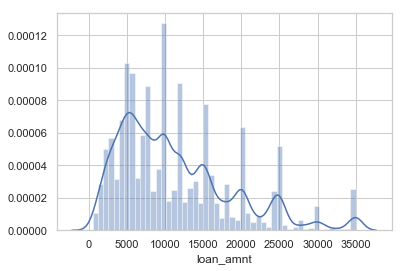

In [13]:
# Distribution of loan amounts of the dataframe
sns.distplot(df_loan.loan_amnt)

The above histogram clearly depicts that the data for loan amounts is 'left-skewed'. Let's further analyse loan amounts by plotting a box-plot.

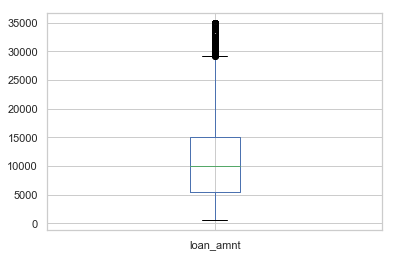

In [14]:
# Loan Amount
df_loan.boxplot(column=['loan_amnt'])

In [15]:
# Descriptive Statistics for loan amounts
df_loan.loan_amnt.describe()

count   38531.00
mean    11303.77
std      7460.52
min       500.00
25%      5525.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

#### Outlier Analysis for Loan Amounts

Let's work on outlier analysis for loan amounts. A data point can be considered an outlier if it lies outside the following range: <br/>
(Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) <br/>

In [16]:
# Outlier Analysis for Loan Amounts
Inter_Quartile_Range = df_loan.loan_amnt.describe()[6] - df_loan.loan_amnt.describe()[4]
First_Quartile = df_loan.loan_amnt.describe()[4]
Third_Quartile = df_loan.loan_amnt.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df_loan['loan_amnt'][(df_loan['loan_amnt'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df_loan['loan_amnt'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: loan_amnt, dtype: int64)

Thus, as the output is Null, it means that all of the data is within the required range of <br/> (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) and there is no outlier data point

#### Conclusion

We can draw the following conclusions for loan amounts data: <br/>
1) The data is left-skewed as the mean and median do not coincide <br/>
2) The highest number of loans issues are for 10,000 dollars<br/>
3) The highest loan amount issued is for 35,000 dollars<br/>
4) The lowest loan amount issued is for 500 dollars<br/>
5) The data does not contain any outliers <br/>

### Interest Rate

In [17]:
# Convert Data type of interest rate to float
df_loan['int_rate'] = df_loan['int_rate'].astype(str)
df_loan.int_rate = df_loan.int_rate.map(lambda x: x.lstrip('+-').rstrip('%'))
df_loan['int_rate'] = df_loan['int_rate'].astype(float)

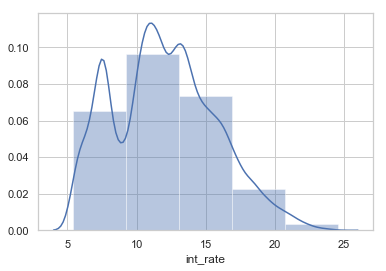

In [18]:
# Interest Rate Distribution
sns.distplot(df_loan.int_rate, bins = 5)

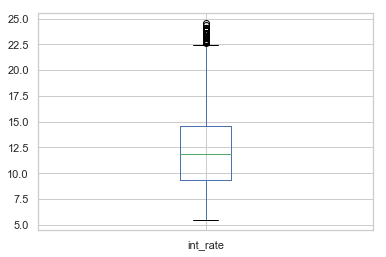

In [19]:
# Observing the spread of interest rate in the data
df_loan.boxplot(column=['int_rate'])

In [20]:
# Descriptive Statistics for interest rates
df_loan.int_rate.describe()

count   38531.00
mean       12.05
std         3.72
min         5.42
25%         9.32
50%        11.86
75%        14.59
max        24.59
Name: int_rate, dtype: float64

#### Outlier Analysis for Interest Rate

In [21]:
# Outlier Analysis for Loan Amounts
Inter_Quartile_Range = df_loan.int_rate.describe()[6] - df_loan.int_rate.describe()[4]
First_Quartile = df_loan.int_rate.describe()[4]
Third_Quartile = df_loan.int_rate.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df_loan['int_rate'][(df_loan['int_rate'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df_loan['int_rate'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: int_rate, dtype: float64)

Thus, as the output is Null, it means that all of the data is within the required range of <br/> (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) and there is no outlier data point

#### Conclusion

We can draw the following conclusions for interest rates data: <br/>
1) The data is slightly left-skewed as the mean and median do not coincide <br/>
2) The highest number of interest rates charged are between the range of 10% to 13%<br/>
3) The highest interest rate charged is 24.59%<br/>
4) The lowest interest rate charged is 5.42% <br/>
5) The data does not contain any outliers <br/>

### Debt to Income Ratio

Debt to Income Ratio = Monthly Debt Payments / Monthly Gross Income (Income excluding tax). <br/>
Source Investopedia - As a general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified for a mortgage. Ideally, lenders prefer a debt-to-income ratio lower than 36%, with no more than 28% of that debt going towards servicing a mortgage or rent payment. <br/>

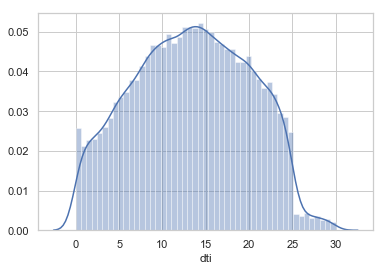

In [22]:
# Debt to Income Ratio Distribution
sns.distplot(df_loan.dti)

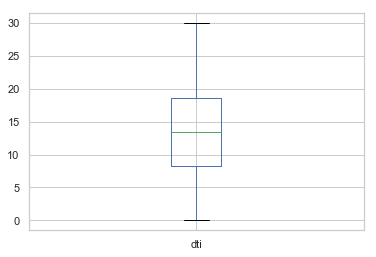

In [23]:
# Observing the spread of debt to income ratio in the data
df_loan.boxplot(column=['dti'])

In [24]:
# Descriptive Statistics for debt to income ratio
df_loan.dti.describe()

count   38531.00
mean       13.33
std         6.66
min         0.00
25%         8.21
50%        13.42
75%        18.60
max        29.99
Name: dti, dtype: float64

#### Conclusion

We can draw the following conclusions for debt to income ratio data: <br/>
1) The data is not skewed as the mean and median are nearly equal <br/>
2) According to investopedia, lenders prefer debt to income ratio less than 36%. In our data, all our data points are lower than 36% which means that borrowers' loans would not be rejected by lenders for the borrowers in this data <br/>
3) For the data points greater than 25%, the count of debt to income ratio drastically decreases. These borrower's loan must be specifically looked into as their debt per monthly income is greater than others. <br/>
4) There is a huge spike at 0% debt to income ratio. This could mean that these borrowers for loan are dependents and may be of a young age as they do not have debts to pay.

### Outstanding Principal

Remaining outstanding principal for total amount funded 

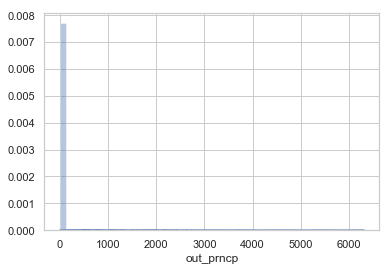

In [25]:
# Distribution of outstanding principal
sns.distplot(df_loan.out_prncp)

#### Conclusion

We can draw the following conclusions for outstanding principal data: <br/>
The data is highly skewed at 0. This basically means that nearly all borrowers have 0 outstanding principal, only a few borrowers are left who are yet to complete their payment of funded amount

## Categorical Variables 

### Loan Status

Current Status of the Loan

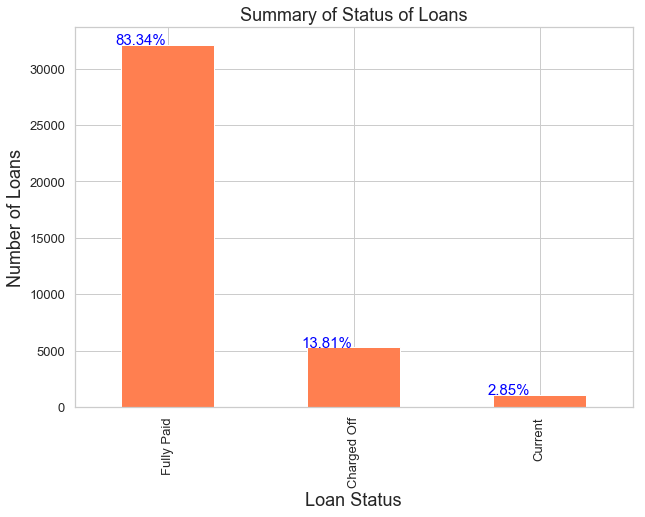

In [26]:
# Percentage of Loans Statuses from data
ax = df_loan['loan_status'].value_counts().plot(kind='bar', figsize=(10,7),color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Summary of Status of Loans", fontsize=18)
ax.set_ylabel("Number of Loans", fontsize=18);
ax.set_xlabel("Loan Status", fontsize=18);

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='blue')

#### Conclusion

We can derive the following conclusions for Loan status: <br/>
1) Charged-Off loans constitute a total of 13.8% of all the loans issued in the data <br/>
2) Most of the loans are paid-off as the Fully paid loans constitute of 83.37% of the data <br/>
3) The major focus in bi-variate analysis would be to focus on charged-off loans and determining which factors lead to loan defaults

### Grade

LC assigned loan grade 

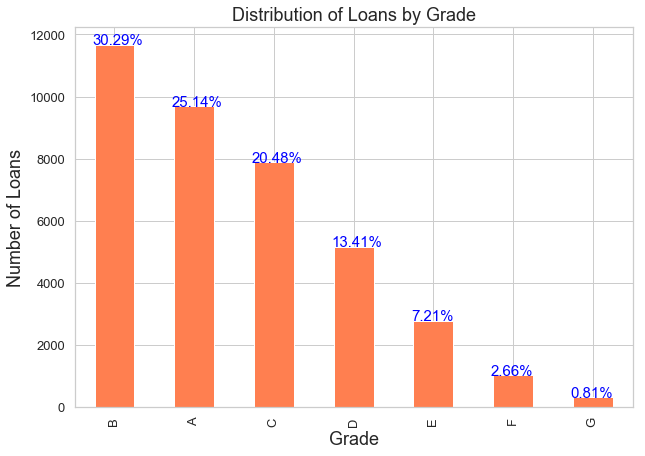

In [27]:
#Identify the percentage of loans by grade
ax = df_loan['grade'].value_counts().plot(kind='bar', figsize=(10,7),color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Loans by Grade", fontsize=18)
ax.set_ylabel("Number of Loans", fontsize=18);
ax.set_xlabel("Grade", fontsize=18);


totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='blue')

#### Conclusion

The grade basically ranks the loans issued. Following conclusions can be infered from the above plot: <br/>
1) Highest number of loans in the data are graded 'B' <br/>
2) Here, Grades A, B and C contribute to nearly 70% of the loans, which infers that nearly 70% of loans have a very low probability to default <br/>
2) Lowest number of loans in the data are graded 'G'. Considering that grade 'G' signifies the worst loans sanctioned or the loans which would have the highest probabability to default, these numbers are quite low.

### Employee Tenure

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

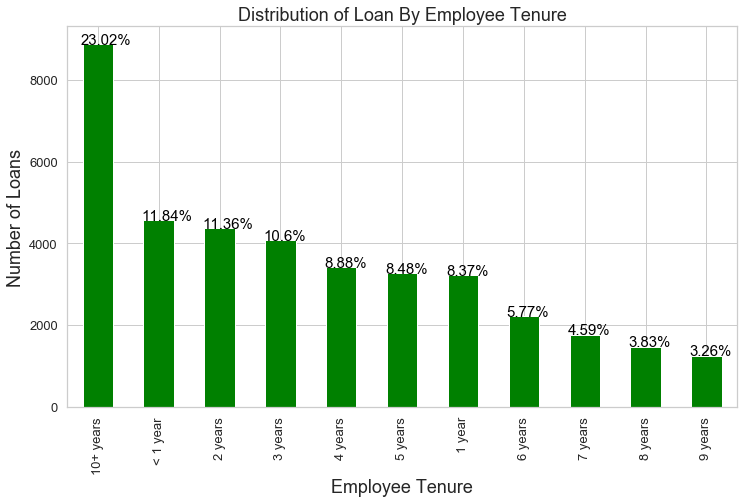

In [28]:
#Identify the percentage of loans by employee tenure
ax = df_loan['emp_length'].value_counts().plot(kind='bar', figsize=(12,7),color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Loan By Employee Tenure", fontsize=18)
ax.set_ylabel("Number of Loans", fontsize=18);
ax.set_xlabel("Employee Tenure", fontsize=18);

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='black')

#### Conclusion 

Employee Tenure is a strong indicator of whether a borrower will default. The following inferences can be drawn from the above plot: <br/>
1) Its obvious to note that a borrowers with 10+ years of experience would have maximum occurrences in the data. This can be due to two reasons, either because 10+ years covered all employee tenures greater than 10+ years and so the data for this set is large. The other reason could be a borrower with 10+ years of experience would earn comparitively higher to his/her counterparts who have less tenure <br/>
2) Another interesting observation here is that there is monotonous decrease in number of loans issues after 2 years of employee tenure. <br/>
3) The above behaviour is not the same when we look into the data for <1 years, 1 year and 2 years. The number of loans sanctioned decreases from <1 year to 1 year and abruptly increases from 1 year to 2 years. <br/>

### Home Ownership

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

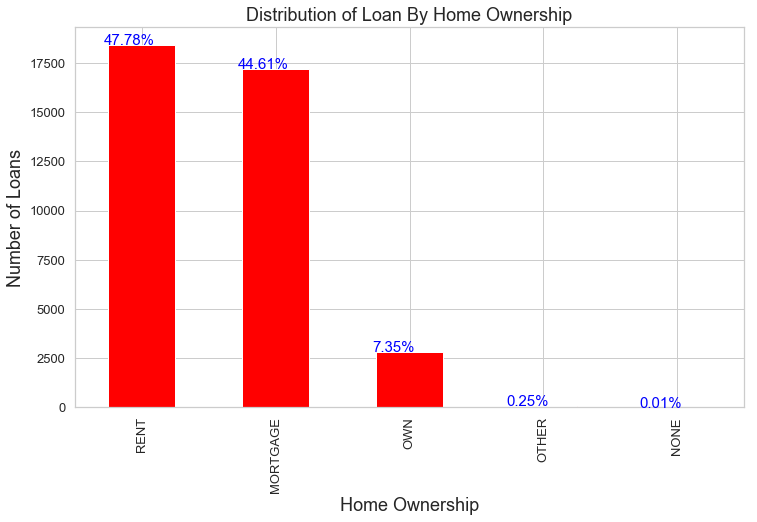

In [29]:
#Identify the percentage of loans by ownership
ax = df_loan['home_ownership'].value_counts().plot(kind='bar', figsize=(12,7),color="red", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Loan By Home Ownership", fontsize=18)
ax.set_ylabel("Number of Loans", fontsize=18);
ax.set_xlabel("Home Ownership", fontsize=18);

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='blue')

#### Conclusion

Home ownership pays a pivotal role in determining whether a borrower would default or not. Following are some inferences derived from the above plot: <br/>
1) Nearly 94% of the loan borrowers do not own a house, which makes it more probable for these borrowers to have a greater debt to income ratio every month, which in turn leads to greater probability of default <br/>
2) There are 7.41% of borrowers who own a house and thus are less probable to default

### Loan Purpose

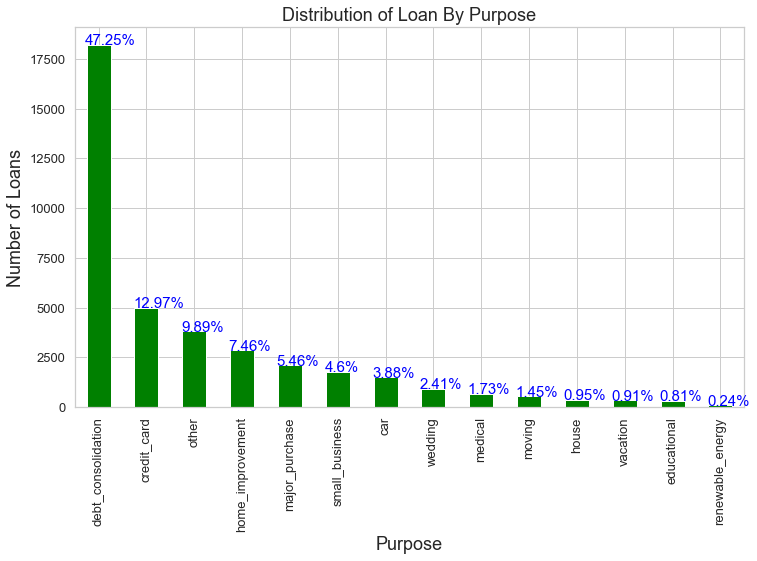

In [30]:
#Identify the percentage of loans by purpose
ax = df_loan['purpose'].value_counts().plot(kind='bar', figsize=(12,7),color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Loan By Purpose", fontsize=18)
ax.set_ylabel("Number of Loans", fontsize=18);
ax.set_xlabel("Purpose", fontsize=18);

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='blue')

#### Conclusion

Following inferences can be made from the plot above: <br/>
1) Nearly half of the loans are borrowed for the purpose of debt consolidation <br/>
2) Its interesting to note that, although, most of the borrowers in our dataset do not own a house, loan for buying a house in the dataset is only 0.94% <br/>

# Bivariate Analysis

In [31]:
#Dataframe for bivariate analysis based on existing dataframe

df_loan_b=df_loan
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan['issue_d_year'] = df_loan['issue_d'].dt.year

df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]


df_loan_charged_off.shape
df_loan_charged_off
#Create derived variable.
df_loan_b.dti.describe()
# Create derived variable 
df_loan_b['dti_bin'] = pd.cut(df_loan_b['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
df_loan.head(5)


,loan_amnt,funded_amnt,term,issue_d,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,open_acc,pub_rec,out_prncp,revol_bal,recoveries,issue_d_year,dti_bin
0,5000,5000,36 months,2011-12-01,10.65,B,10+ years,RENT,24000.00,Verified,...,AZ,27.65,0,3,0,0.00,13648,0.00,2011,25-30
1,2500,2500,60 months,2011-12-01,15.27,C,< 1 year,RENT,30000.00,Source Verified,...,GA,1.00,0,3,0,0.00,1687,117.08,2011,0-5
2,2400,2400,36 months,2011-12-01,15.96,C,10+ years,RENT,12252.00,Not Verified,...,IL,8.72,0,2,0,0.00,2956,0.00,2011,5-10
3,10000,10000,36 months,2011-12-01,13.49,C,10+ years,RENT,49200.00,Source Verified,...,CA,20.00,0,10,0,0.00,5598,0.00,2011,15-20
4,3000,3000,60 months,2011-12-01,12.69,B,1 year,RENT,80000.00,Source Verified,...,OR,17.94,0,15,0,524.06,27783,0.00,2011,15-20


# Home Ownership vs Loan Amount

Text(0.5, 1.0, 'Home Ownership vs Charged Off Loan Amount')

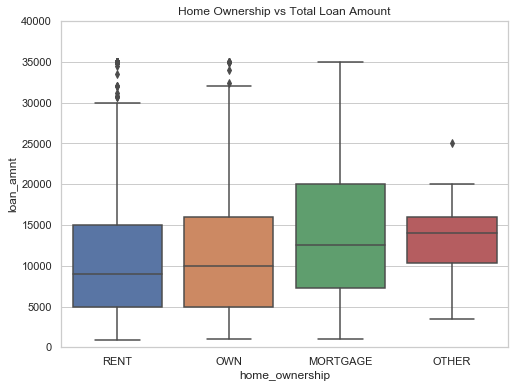

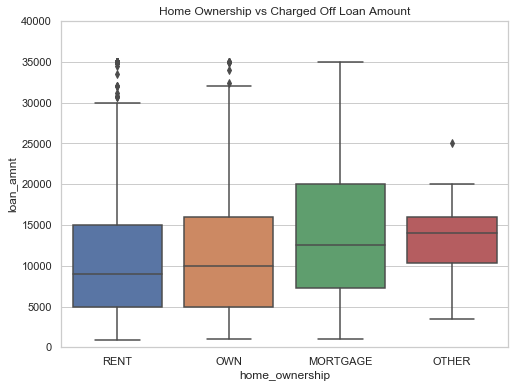

In [32]:
##box plot home_ownership/Loan Amount
var = 'home_ownership'

data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
ax.set_title('Home Ownership vs Total Loan Amount')

##box plot home_ownership/ChargedOff Loan Amount
var = 'home_ownership'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape
df_loan_charged_off
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="loan_amnt", data=data,  )
fig.axis(ymin=0, ymax=40000);
ax.set_title('Home Ownership vs Charged Off Loan Amount')



# Conclusion

We can draw the following conclusions from the above analysis: <br/> 
1) Home_Ownership type "NONE" can be treated as outlier. It is a very small chunk and the split is not even<br/>
2) There is a steady increase in the median when we compare home ownership with charged off loan amount. <br/>
    This indicates the probability of default is higher on loan sanctioned to customers with home ownership - "MORTGAGE". <br/>

# Grade vs Charged Off Loan Amount

Text(0.5, 1.0, 'Grade vs Charged Off Loan Amount')

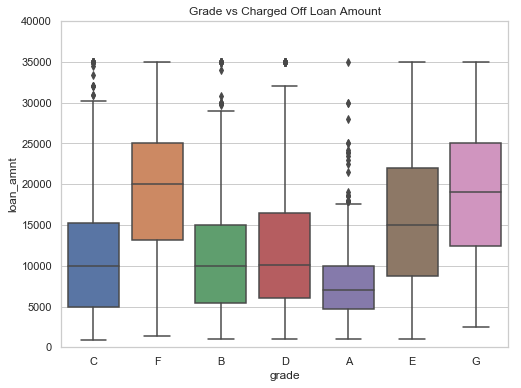

In [33]:
var = 'grade'
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);\
ax.set_title('Grade vs Charged Off Loan Amount')


# Conclusion

We can draw the following conclusions from the above analysis: <br/> 
1) Default on Grade F,G and E  more prominent<br/>
2) There could be elements of customer behaviour or we need an indepth analysis further with employee experience.<br/>

# Verification Status vs Loan Amount

Text(0.5, 1.0, 'Verfication Status vs Charged Off Loan Amount')

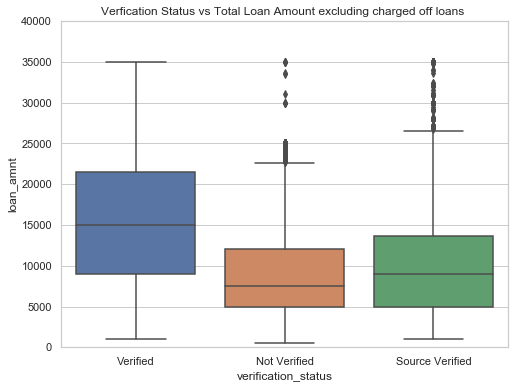

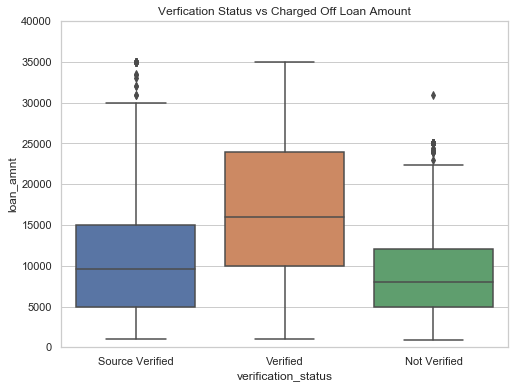

In [34]:
#box plot verification_Status/Total Loan Amount excluding charged off loans
var = 'verification_status'
df_loan_c = df_loan_b[df_loan_b['loan_status'].isin(['Fully Paid','Current'])]
data = pd.concat([df_loan_c['loan_amnt'], df_loan_c[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
ax.set_title('Verfication Status vs Total Loan Amount excluding charged off loans ')
var = 'verification_status'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape
df_loan_charged_off
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
ax.set_title('Verfication Status vs Charged Off Loan Amount')

# Conclusion

We can draw the following conclusions: <br/> 
1) The amount of default and loss to the lender happens mainly for verified customers<br/>
2) The amount of loss related to verified customers is huge. This seems to be a big risk for lenders in terms of loss. Lenders can calculate risk appetite of verified customers on regular basis.<br/>

# Purpose vs Charged off Loan Amount

Text(0.5, 1.0, 'Loan Purpose vs Charged Off Loan Amount')

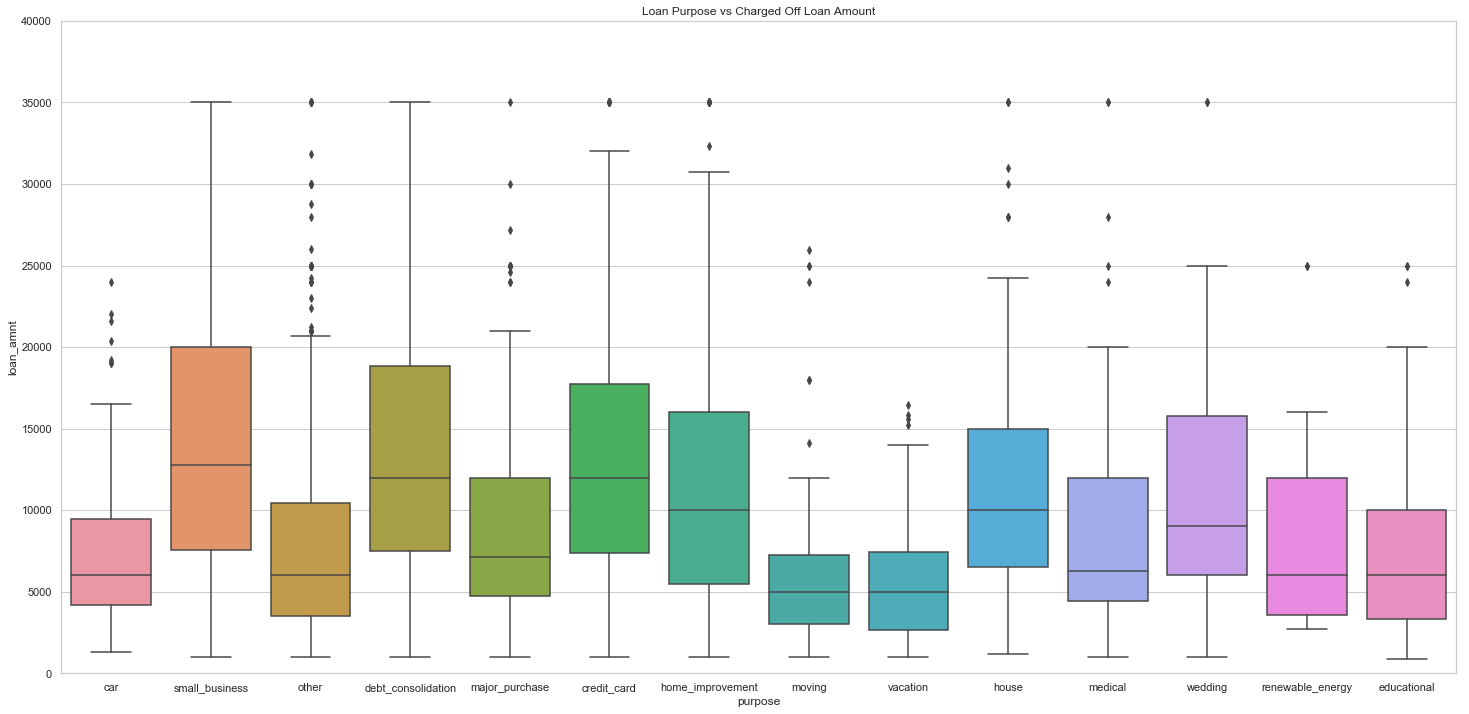

In [35]:
var = 'purpose'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape
df_loan_charged_off
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 12))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
ax.set_title('Loan Purpose vs Charged Off Loan Amount')


# Conclusion

We can draw the following conclusions: <br/> 
1) The amount of default and loss to the lender happens mainly for customers who have borrowed for small business, debt consolidation and credit card <br/>
2) Lenders should identify the reasons why such customers are not able to repay. A regular credit score or history could be monitored for such customers<br/>

# Debt Ratio vs Charged Off Loan Amount & Debt Ratio vs Annual Income of Charged off Loan

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


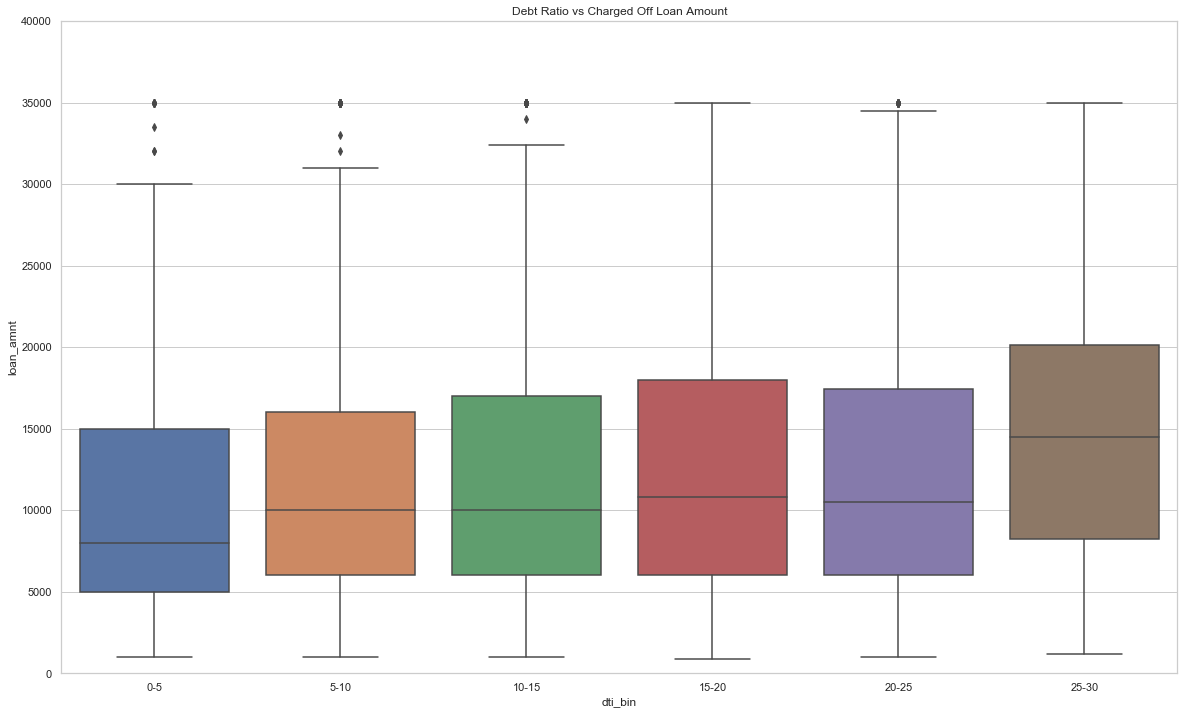

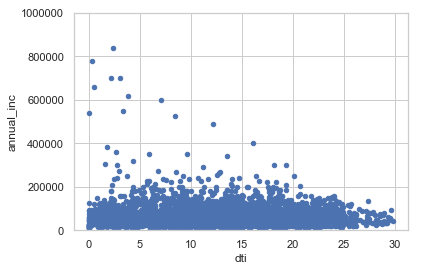

In [36]:
##box plot Debt Ratio/Charged off Loan
#Create derived variable. This can be accomodated in pre-processing steps
df_loan_b.dti.describe()
# Create derived variable 
df_loan_b['dti_bin'] = pd.cut(df_loan_b['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

var = 'dti_bin'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape
df_loan_charged_off
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
ax.set_title('Debt Ratio vs Charged Off Loan Amount')

#scatter plot Debt Ratio/annualincome
var = 'dti'
df_loan_c =  df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]

data = pd.concat([df_loan_c['annual_inc'], df_loan_c[var]], axis=1)
data.plot.scatter(x=var, y='annual_inc', ylim=(0,1000000));


# Conclusion

We can draw the following conclusions: <br/>  
1) Customers with higher debt ratio will default regularly.<br/> 
2) Scatter plot indicates the debt ratio is primarily higher for low income earners and are quite likely to default.<br/> 
3) Lenders could do carry out due diligence on these factors during verification process.<br/> 

# Interest Rate vs Charged Off Loan Amount

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


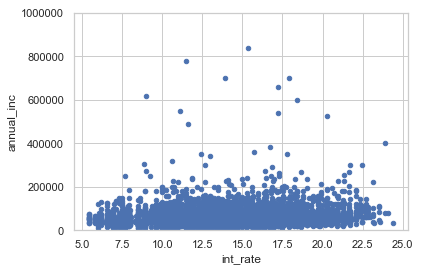

In [37]:
#scatter Interest Rate vs Charged Off Loan Amount
var = 'int_rate'
df_loan_c =  df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
data = pd.concat([df_loan_c['annual_inc'], df_loan_c[var]], axis=1)
data.plot.scatter(x=var, y='annual_inc', ylim=(0,1000000));

# Conclusion

We can draw the following conclusions: <br/>  
1) Customers with higher income will have less interest rate. For eg. Earning above 200000 USD.<br/> 
2) Scatter plot indicates the higher interest rate is primarily higher for low and mid income earners less than 200000 USD and are quite likely to default.<br/> 
3) Lenders could do a regular review may be quarterly or six monthly to track the payments and engage with the customers to find out scenarios like financial situation,medical condition ,bankcruptcy etc.<br/> 

# Loan Issue Year vs Annual Income vs Interest Rate vs Pub_Rec vs Charged Off Loan Amount

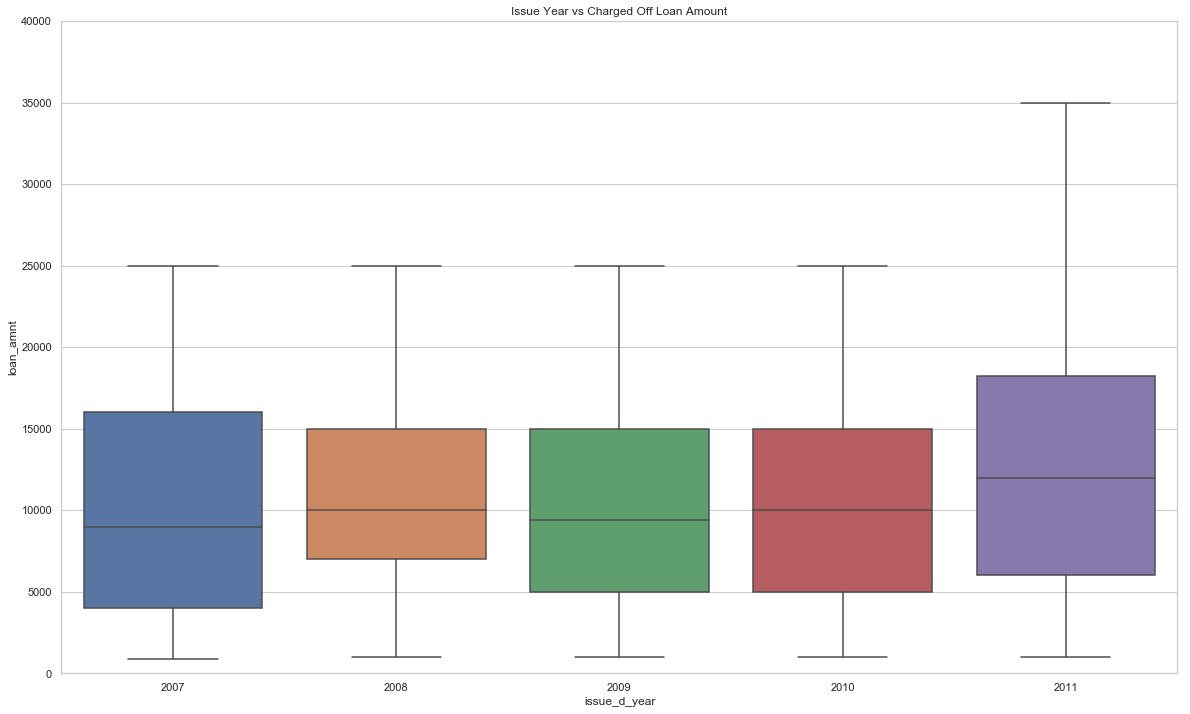

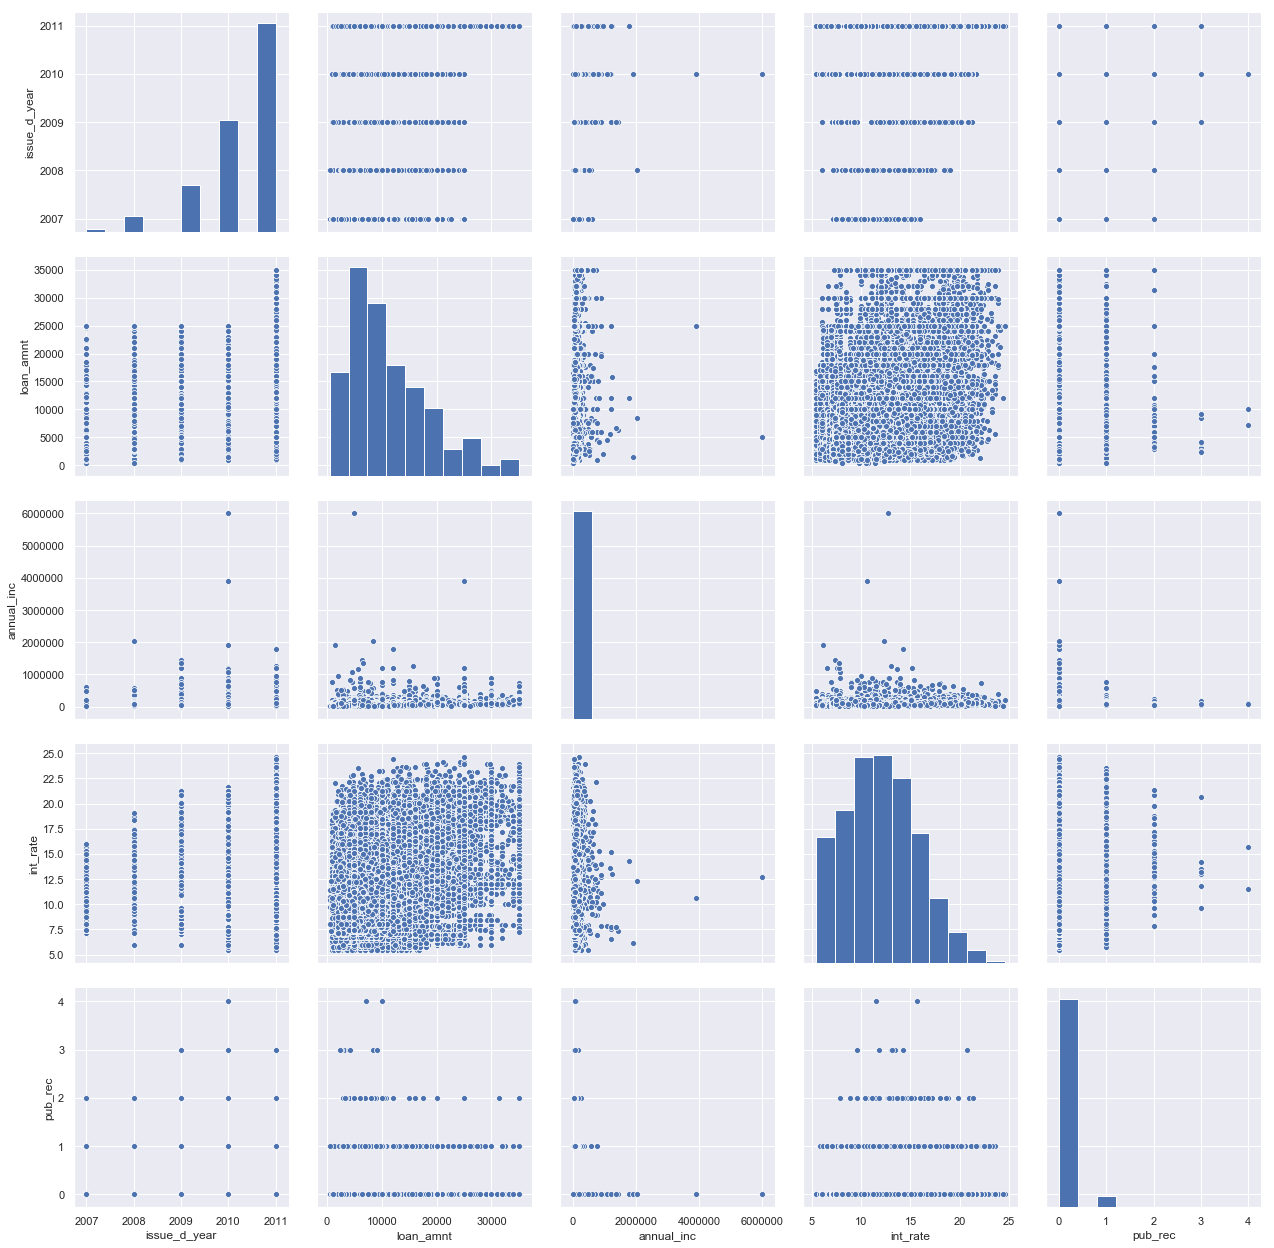

In [38]:
var = 'issue_d_year'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape
df_loan_charged_off
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
ax.set_title('Issue Year vs Charged Off Loan Amount')

#scatterplot
sns.set()
cols = ['issue_d_year','loan_amnt', 'annual_inc', 'int_rate','pub_rec']
sns.pairplot(df_loan_b[cols], size = 3.5)
plt.show();

# Conclusion

We can draw the following conclusions: <br/>  
1) Box plot shows default loans were constant from period 2007-2010 and there is a spike in 2011.<br/>  
2) Scatter pairplot indicates the range of interest rates offered to the customers went highest in 2011.<br/> 
3) Scatter pairplot also indicates there is a steep increase in derogatory public records from 2009-2011.<br/>
4) Scatter pairplot also indicates there is a pool of derogatory public records atleast between 0 to 1 over the interest rates offered.<br/>
5) Scatter pairplot also indicates annual income is indirectly propotional to derogatory public records. This derrogatory public records increases for income earners less than 2,000,000 USD.<br/>

# State vs Charged Off Loan Amount vs Total Loan Amount

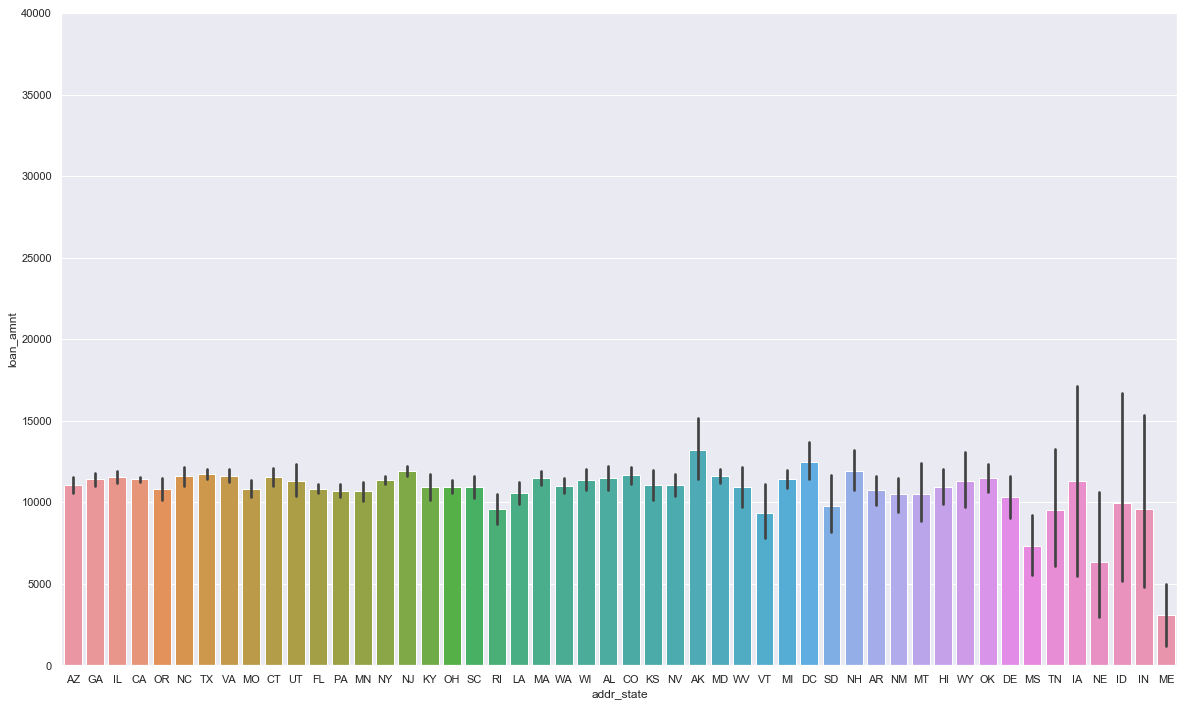

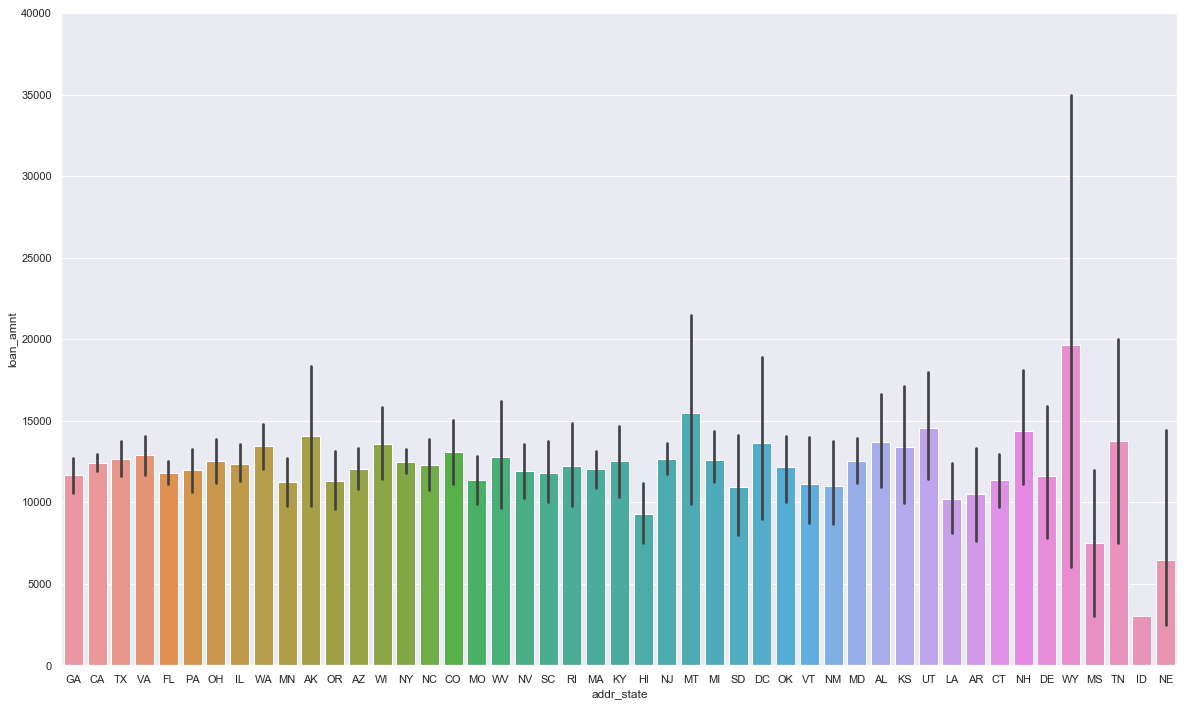

In [39]:
##box plot State /Charged off Loan
var = 'addr_state'
data = pd.concat([df_loan_b['loan_amnt'], df_loan_b[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.barplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);
var = 'addr_state'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape
df_loan_charged_off
data = pd.concat([df_loan_charged_off['loan_amnt'], df_loan_charged_off[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.barplot(x=var, y="loan_amnt", data=data)
fig.axis(ymin=0, ymax=40000);

# Conclusion

We can draw the following conclusions: <br/>  
1) Bar plot shows default loans were massive in WY and then in MT,DC,UT,NH,TN,AK,CO,WV. This could indicate similar customer patterns or behaviour.<br/>

# Multivariate Analysis: Purpose vs Grade vs Emp_Length vs Charged Off Loan Amount

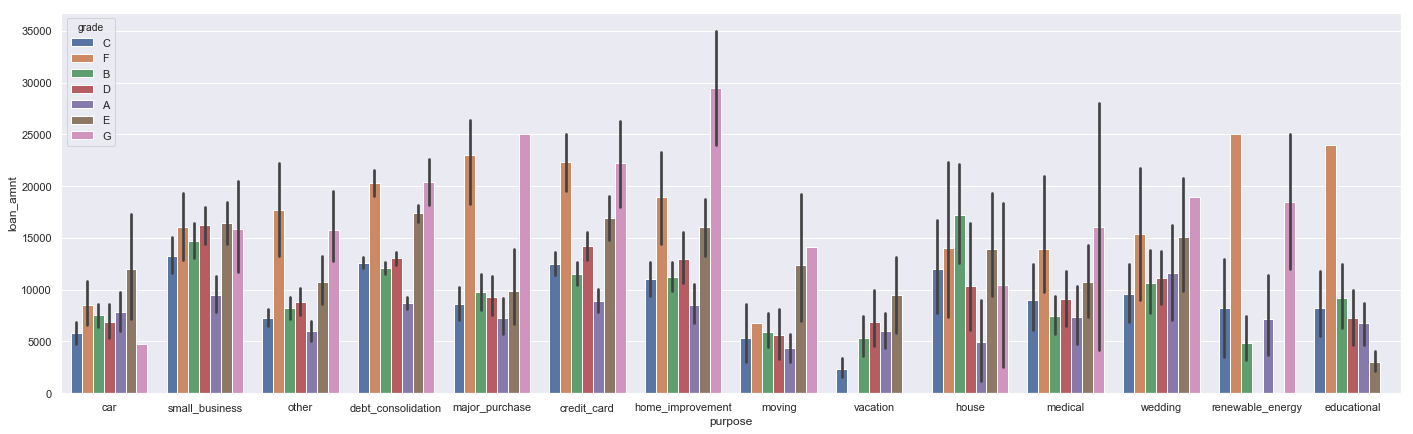

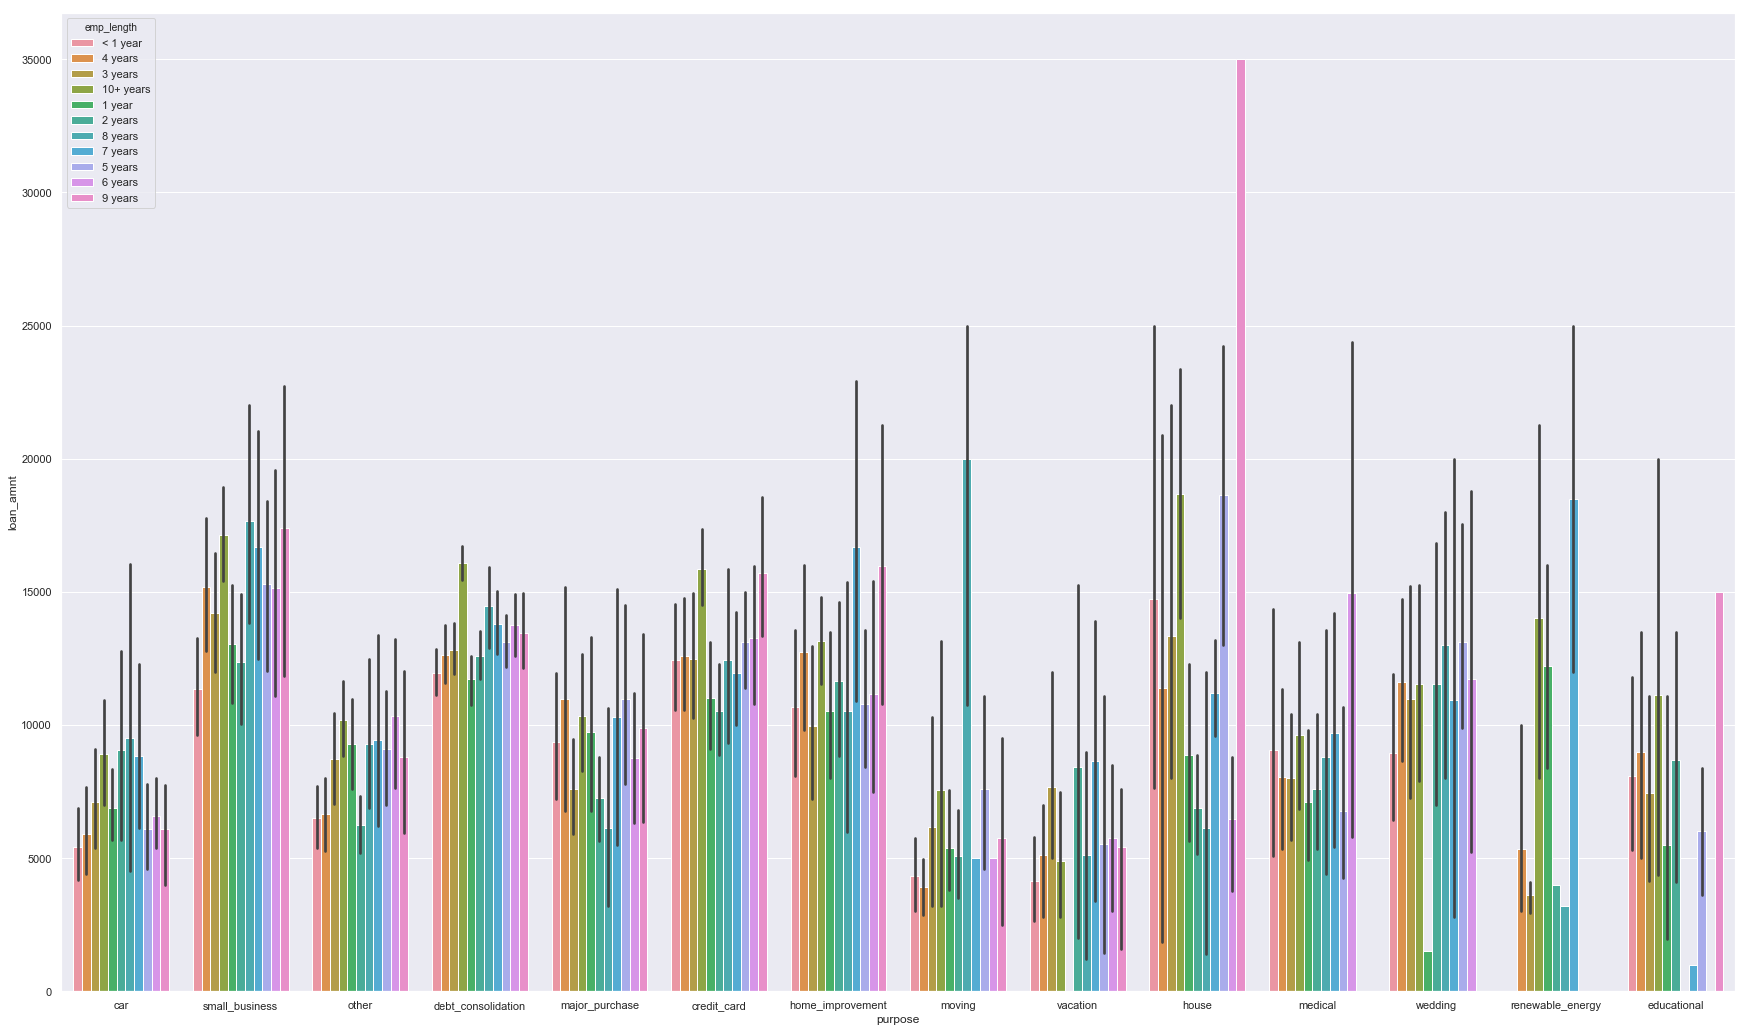

In [40]:
var = 'purpose'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape

plt.figure(figsize=(24,7))
sns.barplot(x='purpose', y='loan_amnt', hue='grade',data=df_loan_charged_off, estimator=np.mean)
plt.show()

var = 'purpose'
df_loan_charged_off = df_loan_b[df_loan_b['loan_status'].isin(['Charged Off'])]
df_loan_charged_off.shape

plt.figure(figsize=(30,18))
sns.barplot(x='purpose', y='loan_amnt', hue='emp_length',data=df_loan_charged_off, estimator=np.mean)
plt.show()


# Conclusion

We can draw the following conclusions: <br/>  
1) First Bar plot shows default loans were the most in home_improvement, debt consolidation and credit cards. The default loans is average over 15000 USD across other categories of purpose.<br/>
2) First Bar plot also indicates the default is highest among customers employed at Grade-'G' and 'F'. <br/>
3) Second Bar plot indicates the default is maximum among employees/customers with 9 years of work experience with purpose as house and also in mid level and 10+ years. Primarily this could be due to owning already existing house or portfolios and other factors could be marital status, family growth or change in job circumstances.<br/> 
4) Second Bar plot indicates the default is maximum among small business and house and then debt_consolidation, credit_card and major purchases. <br/> 

# Final Conclusion Post EDA Analysis

Customers attributes/variables like purpose, employee length indicates there is a strong loss incurred due to default loans.
Lenders are facing a huge loss based on the insights derived from Pub_Rec and Int_Rate. This also has an association with source as verified. <br/>
It seems the due diligence like strong credit checks and monitoring of payments is a must to avoid default.
Year 2011 has a massive spike on default primarily due to hike in interest rates. <br/>
Customer behavior with senior level experience should be tracked. Multivariate pattern indicates these customers default despite their income being higher.<br/>
Regular credit monitoring should be done across the customers of states in default.<br/>
The other rationale to above conclusion would be lending should be done in small chunks based on customers credit score with variable interest rates.<br/> 
Lenders should calculate frequent risk appetite state wise and also provide a loan which suits on the basis of similar borrower profiles.<br/> 
